https://www.ml-zhuang.club/3808/231/

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import SVC

In [32]:
# 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征归一化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:
# 定义MC-SVM模型
model = OneVsOneClassifier(SVC())

# 模型训练
model.fit(X_train_scaled, y_train)

# 模型预测
y_pred = model.predict(X_test_scaled)


In [34]:
# 准确率评估
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [35]:
# 可视化决策边界（仅适用于2个特征）
print(X_train_scaled.shape[1])

if X_train_scaled.shape[1] == 2:
    print("Decision boundary visualization")
    
    h = 0.02  # 步长
    x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
    y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Set1)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.title('Decision boundary')
    plt.show()

4


## 限制2个特征的代码：

In [26]:
# 导入鸢尾花数据集
iris = datasets.load_iris()
X = iris.data[:, :2]  # 仅选择前两个特征
y = iris.target

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征归一化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
# 定义MC-SVM模型
model = OneVsOneClassifier(SVC())

# 模型训练
model.fit(X_train_scaled, y_train)

# 模型预测
y_pred = model.predict(X_test_scaled)


In [28]:
# 准确率评估
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.9


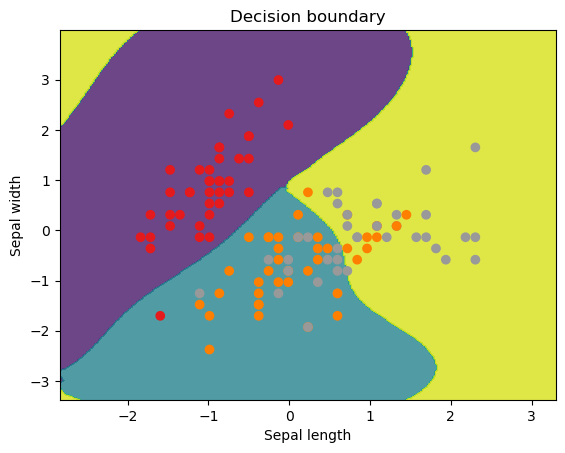

In [29]:
# 可视化决策边界
h = 0.02  # 步长
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Set1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Decision boundary')
plt.show()